<a href="https://colab.research.google.com/github/Alokaraj/ML/blob/master/Ham%26Spam_Multinomial_Naive_Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = 'http://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
sms = pd.read_table(url,sep = '\t',header = None,names = ['label','message'])



In [3]:
print(sms.shape)

print(sms.head(10))

print(sms.label.value_counts())




(5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...
ham     4825
spam     747
Name: label, dtype: int64


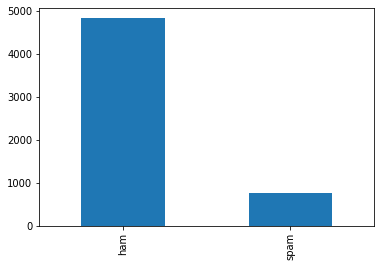

In [4]:
#to Visualization
import matplotlib.pyplot as plt
y = sms.label.value_counts()
plt.show(y.plot(kind='bar'))



In [5]:
sms['label_num']=sms.label.map({'ham':0,'spam':1})#map 0 & 1 to ham and spam.

print(sms.shape)

print(sms.head(5))


(5572, 3)
  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


In [6]:

x=sms.message

y=sms.label_num

print(x.shape)
print(y.shape)

(5572,)
(5572,)


In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(X_train.shape)#traing messages
print(X_test.shape)#testing messages
print(y_train.shape)#training labels
print(y_test.shape)#testing labels


# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

(4179,)
(1393,)
(4179,)
(1393,)


In [8]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)


# equivalently: combine fit and transform into a single step
#X_train_dtm = vect.fit_transform(X_train)


print(X_train_dtm.shape)


# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(X_test_dtm.shape)


(4179, 7456)
(1393, 7456)


In [9]:
'''The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). 
The multinomial distribution normally requires integer feature counts.
However, in practice, fractional counts such as tf-idf may also work'''


# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


# train the model using X_train_dtm (timing it with an IPython "magic command")
nb.fit(X_train_dtm, y_train)


# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)
y_pred_class





array([0, 0, 0, ..., 0, 1, 0])

In [11]:
test_arr=["I am a boy","i want free entry"]
x_test=pd.Series(test_arr)
x_test=vect.transform(x_test)
nb.fit(X_train_dtm, y_train)
y_pred_class1 = nb.predict(x_test)
print(y_pred_class1)

print(len(y_pred_class))


print("True     :",y_test.values[0:25])
print("predicted:",y_pred_class[0:25])


[0 1]
1393
True     : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [12]:
count=0
for i in range(len(y_pred_class)):
    if y_test.values[i]==y_pred_class[i]:
        count=count+1
print(count)

print("accuracy percentage",count/len(y_pred_class))


1377
accuracy percentage 0.9885139985642498
